In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from netCDF4 import Dataset
import cdsapi

#import cdstoolbox as ct


In [234]:
panel_data = pd.read_pickle('panel_data2')
data = pd.read_pickle('data2')

,0,1,2,3,4,5,6,7,8,9,...,154,155,156,157,158,159,160,161,162,model
ACCESS_CM2,0.375954,0.973208,0.497969,0.357068,0.355483,0.075743,0.457747,0.404658,0.364769,0.359265,...,0.877988,1.331639,0.754243,0.893143,1.070729,0.946666,1.065684,1.747993,1.440901,ACCESS_CM2
CanESM5_CanOE,0.070961,-0.037884,-0.114808,0.024674,-0.313223,0.342073,0.041480,-0.054697,0.089825,0.022939,...,1.484307,1.195094,1.546099,1.464548,1.579082,1.599628,1.562484,2.044906,2.201975,CanESM5_CanOE
CAMS_CSM1,0.420861,0.155254,0.241645,-0.142521,0.105660,0.250230,-0.038423,0.037168,0.073412,0.052746,...,0.604932,0.809077,0.754230,0.704756,0.881029,0.461860,0.911565,0.747658,1.129419,CAMS_CSM1
CNRM_CM6,-0.581082,-0.416199,-0.350545,-0.439142,-0.498021,-0.356450,-0.638886,-0.698903,-0.715590,-0.253494,...,0.721402,0.831528,1.195797,1.039085,1.164883,0.836600,0.973993,0.992446,1.250461,CNRM_CM6
CNRM_ESM1,0.424696,0.248771,0.194304,-0.006229,-0.238467,-0.277502,-0.013747,-0.504865,0.339638,0.290103,...,1.101596,1.184901,0.985517,1.596023,1.009894,1.104560,0.983257,1.093769,1.049651,CNRM_ESM1
HadGEM_GC31_LL,0.549923,0.604639,0.642588,0.375610,0.591042,0.710176,1.019449,1.091706,0.507917,0.833559,...,1.688518,1.776143,1.970851,1.823069,1.507112,1.816843,2.161680,2.242140,1.872814,HadGEM_GC31_LL
MIROC6,0.045581,0.135325,-0.020864,0.286527,0.626435,-0.085767,-0.032126,0.024868,0.183334,0.251997,...,0.839724,1.089104,0.998434,1.260334,1.469412,1.159357,0.824013,1.091642,1.361308,MIROC6
UKESM1,0.640044,0.712845,0.932074,0.806349,0.632522,0.871653,0.699701,0.936906,0.815910,1.031701,...,1.511475,1.248112,1.406077,1.794811,1.795474,1.649651,2.046785,1.740632,2.113947,UKESM1
MPI_ESM1,-0.873166,-0.160150,-0.061251,0.113324,-0.402573,-0.344173,-0.511113,0.007564,-0.430379,-0.233795,...,0.681986,0.786139,0.545648,0.979177,0.758804,0.887692,1.074488,0.855597,0.682858,MPI_ESM1
INM_CM4,0.208982,-0.069049,0.171365,-0.312161,-0.411779,-0.311584,-0.170907,-0.034221,-0.236434,-0.008340,...,0.976792,0.774531,0.838556,0.660769,0.765237,1.077477,0.801303,0.719140,1.133936,INM_CM4


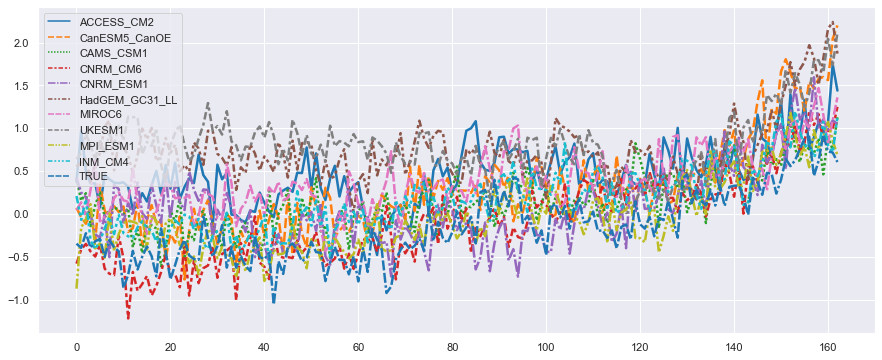

In [235]:
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(data=data, palette="tab10", linewidth=2.5)
panel_data

In [236]:
def find_initial_errors(df):
    diction = dict()
    for (index, colname) in enumerate(df):
        diction[colname] = mean_squared_error(df[colname], df['TRUE'])
    print(diction)
    return diction

In [237]:
find_initial_errors(data)

{'ACCESS_CM2': 0.49331557789127595, 'CanESM5_CanOE': 0.3210646409663524, 'CAMS_CSM1': 0.17563633981676638, 'CNRM_CM6': 0.10332651673280996, 'CNRM_ESM1': 0.2134831471840875, 'HadGEM_GC31_LL': 0.959958410216865, 'MIROC6': 0.3782243752391241, 'UKESM1': 1.1205402510203701, 'MPI_ESM1': 0.08160170657669802, 'INM_CM4': 0.1729766106343462, 'TRUE': 0.0}


{'ACCESS_CM2': 0.49331557789127595,
 'CanESM5_CanOE': 0.3210646409663524,
 'CAMS_CSM1': 0.17563633981676638,
 'CNRM_CM6': 0.10332651673280996,
 'CNRM_ESM1': 0.2134831471840875,
 'HadGEM_GC31_LL': 0.959958410216865,
 'MIROC6': 0.3782243752391241,
 'UKESM1': 1.1205402510203701,
 'MPI_ESM1': 0.08160170657669802,
 'INM_CM4': 0.1729766106343462,
 'TRUE': 0.0}

# Synthetic Controls

In [301]:
#first approach naive least square regression with no additional predictors 
#test with one of the models because current true temperature data do not seem correct
from scipy.optimize import fmin_slsqp
from sklearn.metrics import mean_squared_error
X1_all = panel_data.loc['TRUE']
X0_all = panel_data.loc[panel_data.index != 'TRUE', :]

X1_all.shape

(164,)

In [302]:
#use years 120-150 as predictors leave rest  for validation
X0 = X0_all.loc[:,[i for i in list(range(100, 150))]].values.T
X1 = X1_all.loc[[i for i in list(range(100, 150))]].values.reshape(-1,1)
X0_val = X0_all.loc[:,[i for i in list(range(150, 163))]].values
X1_val = X1_all.loc[[i for i in list(range(150, 163))]].values.reshape(-1,1)
#5-year avg
X0_mean = X0_all.loc[:,[i for i in list(range(0, 120))]].values
X1_mean = X1_all.loc[[i for i in list(range(0, 120))]].values.reshape(-1,1)
X0_mean_val = X0_all.loc[:,[i for i in list(range(120, 160))]].values
X1_mean_val = X1_all.loc[[i for i in list(range(120, 160))]].values.reshape(-1,1)
X1_mean = np.average(X1_mean.reshape(-1, 5), axis=1).reshape(-1,1)
X0_mean = np.average(X0_mean.reshape(-1, 5), axis=1).reshape(24,10)
X0_mean_val = np.average(X0_mean_val.reshape(-1, 5), axis=1).reshape(8,10)
X1_mean_val = np.average(X1_mean_val.reshape(-1, 5), axis=1).reshape(-1,1)
#use years 0-50
X0_zero = X0_all.loc[:,[i for i in list(range(0, 50))]].values.T
X1_zero = X1_all.loc[[i for i in list(range(0, 50))]].values.reshape(-1,1)
#use years 10-60
X0_ten = X0_all.loc[:,[i for i in list(range(10, 60))]].values.T
X1_ten = X1_all.loc[[i for i in list(range(10, 60))]].values.reshape(-1,1)
#use years 20-70
X0_20 = X0_all.loc[:,[i for i in list(range(20, 70))]].values.T
X1_20 = X1_all.loc[[i for i in list(range(20, 70))]].values.reshape(-1,1)
#use years 0-70
X0_zero_70 = X0_all.loc[:,[i for i in list(range(0, 70))]].values.T
X1_zero_70 = X1_all.loc[[i for i in list(range(0, 70))]].values.reshape(-1,1)
#use years 50-100
X0_fifty = X0_all.loc[:,[i for i in list(range(50, 100))]].values.T
X1_fifty = X1_all.loc[[i for i in list(range(50, 100))]].values.reshape(-1,1)
#use years 100-150
X0_hundreed = X0_all.loc[:,[i for i in list(range(100, 150))]].values.T
X1_hundreed= X1_all.loc[[i for i in list(range(100, 150))]].values.reshape(-1,1)
#use years 120-140
X0_120_140= X0_all.loc[:,[i for i in list(range(120, 140))]].values.T
X1_120_140 = X1_all.loc[[i for i in list(range(120, 140))]].values.reshape(-1,1)
#use years 0-100
X0_0_100 = X0_all.loc[:,[i for i in list(range(0, 100))]].values.T
X1_0_100 = X1_all.loc[[i for i in list(range(0, 100))]].values.reshape(-1,1)
#use years 0-150
X0_0_150 = X0_all.loc[:,[i for i in list(range(0, 150))]].values.T
X1_0_150 = X1_all.loc[[i for i in list(range(0, 150))]].values.reshape(-1,1)
#use years 100-120
X0_interv_20 = X0_all.loc[:,[i for i in list(range(100, 120))]].values.T
X1_interv_20 = X1_all.loc[[i for i in list(range(100, 120))]].values.reshape(-1,1)
X0_all_plot = X0_all.loc[:,[i for i in list(range(0, 163))]].values
X1_all_plot = X1_all.loc[[i for i in list(range(0, 163))]].values.reshape(-1,1)

In [303]:
print(X0.shape)
print(X1.shape)
z=[1]
l= [9]
c=z+l
print(c)

(50, 10)
(50, 1)
[1, 9]


In [304]:
def w_mse(w,  x0, x1): return mean_squared_error(x1, x0.dot(w))#, sample_weight=v)

def w_constraint(w,  x0, x1): return np.sum(w) - 1

def v_constraint(V, W, X0, X1): return np.sum(V) - 1

def fun_w(w, v, x0, x1): return fmin_slsqp(w_mse, w, bounds=[(0.0, 1.0)]*len(w), f_eqcons=w_constraint, 
                                           args=( x0, x1), disp=False, full_output=True)[0]
def solve_synthetic_control_basic(X0, X1):
    k,j= X0.shape
    V = 1/k*np.ones(k)
    W0 = 1/j*np.zeros(j).transpose()
    W = fun_w(W0, V, X0, X1)
   # print(W)
    #print(V)
    return V, W



In [309]:
def remain_error(W, df_donors,df_true, low_bound,up_bound):
    l = list(range(0, low_bound))+list(range(up_bound+1, 163))
    df1 = df_true.loc[[i for i in l]].values.reshape(-1,1)
    df0 = df_donors.loc[:,[i for i in l]].values
    return mean_squared_error( df1,(df0.T).dot(W),squared=False) 
    

mean squared reconstruction error using T=120-150:  0.07038515088431699
validation error:  0.2690167633549422
mean squared reconstruction error using T=0-50:  0.07117627917402845
validation error:  0.2873593234357653
mean squared reconstruction error using T=50-100:  0.06472483930211406
validation error:  0.25235295603236074
mean squared reconstruction error using T=100-150:  0.07038515088431699
validation error:  0.27503379106422043
mean squared reconstruction error using T=120-140:  0.06271456553956638
validation error:  0.25776852887823615
mean squared reconstruction error using T=0-100:  0.0631428592104464
validation error:  0.25522830153845383
mean squared reconstruction error using T=20-70:  0.06334144803122072
validation error:  0.25399333302083715
mean squared reconstruction error using T=10-60:  0.06923752325396233
validation error:  0.2776067355545343
mean squared reconstruction error using T=0-70:  0.06717678121145845
validation error:  0.27494669581851383


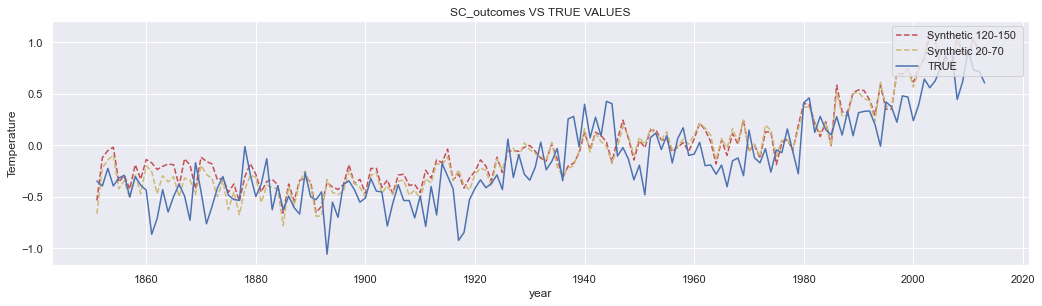

0.06717678121145845


In [319]:
#use 120-150
V1, W1 = solve_synthetic_control_basic(X0, X1)
SC_outcomes0 = (X0_all_plot.T).dot(W1)
true_outcomes = X1_all_plot
true_error = remain_error(W1, X0_all,X1_all, 120,150)
print('mean squared reconstruction error using T=120-150: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W1)))
print('validation error: ', true_error)
#use 0-50
V, W = solve_synthetic_control_basic(X0_zero, X1_zero)
SC_outcomes1 = (X0_all_plot.T).dot(W)
true_outcomes = X1_all_plot
true_error =  remain_error(W, X0_all,X1_all, 0,50)
print('mean squared reconstruction error using T=0-50: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W)))
print('validation error: ', true_error)
#use 50-100
V0, W0 = solve_synthetic_control_basic(X0_fifty, X1_fifty)
SC_outcomes = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error =  remain_error(W0, X0_all,X1_all, 50,100)
print('mean squared reconstruction error using T=50-100: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: ', true_error)
#use 100-150
V0, W0 = solve_synthetic_control_basic(X0_hundreed, X1_hundreed)
SC_outcomes = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error =  remain_error(W0, X0_all,X1_all, 100,150)
print('mean squared reconstruction error using T=100-150: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: ', true_error)
#use 120-140
V0, W0 = solve_synthetic_control_basic(X0_120_140, X1_120_140)
SC_outcomes3 = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error = remain_error(W0, X0_all,X1_all, 120,140)
print('mean squared reconstruction error using T=120-140: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: ', true_error)
#use 0-100
V0, W0 = solve_synthetic_control_basic(X0_0_100, X1_0_100)
SC_outcomes = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error = remain_error(W0, X0_all,X1_all, 0,100)
print('mean squared reconstruction error using T=0-100: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: ', true_error)
#use 20-70
V0, W0 = solve_synthetic_control_basic(X0_20, X1_20)
SC_outcomes2 = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error = remain_error(W0, X0_all,X1_all, 20,70)
print('mean squared reconstruction error using T=20-70: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: ', true_error)
#use 10-60
V0, W0 = solve_synthetic_control_basic(X0_ten, X1_ten)
SC_outcomes = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error = remain_error(W0, X0_all,X1_all, 10,60)
print('mean squared reconstruction error using T=10-60: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: ', true_error)
#use 0-70
V0, W0 = solve_synthetic_control_basic(X0_zero_70, X1_zero_70)
SC_outcomes = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error = remain_error(W0, X0_all,X1_all, 0,70)
print('mean squared reconstruction error using T=0-70: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: ', true_error)

    
fig = plt.figure(figsize=(17.5,4.5)) 
plt.plot(range(1851,2014),SC_outcomes0, 'r--', label="Synthetic 120-150 ");

plt.plot(range(1851,2014),SC_outcomes2,'y--', label="Synthetic 20-70");
plt.plot(range(1851,2014),true_outcomes, 'b-', label="TRUE");
plt.ylabel('Temperature')
plt.xlabel('year')
plt.legend(loc='upper right')
plt.title("SC_outcomes VS TRUE VALUES")
plt.show()
fig.savefig("prop99_figure2", dpi=300)
print(mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))

In [323]:
predictors = pd.read_pickle('predictors.T')
Z1_all = predictors.loc['TRUE']
Z0_all = predictors.loc[panel_data.index != 'TRUE', :]

#use years 120-150 \
Z0 = Z0_all.loc[:,[i for i in list(range(100, 150))]].values.T
Z1 = Z1_all.loc[[i for i in list(range(100, 150))]].values.reshape(-1,1)
#use years 0-50
Z0_zero = Z0_all.loc[:,[i for i in list(range(0, 50))]].values.T
Z1_zero = Z1_all.loc[[i for i in list(range(0, 50))]].values.reshape(-1,1)
#use years 10-60
Z0_ten = Z0_all.loc[:,[i for i in list(range(10, 60))]].values.T
Z1_ten = Z1_all.loc[[i for i in list(range(10, 60))]].values.reshape(-1,1)
#use years 20-70
Z0_20 = Z0_all.loc[:,[i for i in list(range(20, 70))]].values.T
Z1_20 = Z1_all.loc[[i for i in list(range(20, 70))]].values.reshape(-1,1)
#use years 0-70
Z0_zero_70 = Z0_all.loc[:,[i for i in list(range(0, 70))]].values.T
Z1_zero_70 = Z1_all.loc[[i for i in list(range(0, 70))]].values.reshape(-1,1)
#use years 50-100
Z0_fifty = Z0_all.loc[:,[i for i in list(range(50, 100))]].values.T
Z1_fifty = Z1_all.loc[[i for i in list(range(50, 100))]].values.reshape(-1,1)
#use years 100-150
Z0_hundreed = Z0_all.loc[:,[i for i in list(range(100, 150))]].values.T
Z1_hundreed= Z1_all.loc[[i for i in list(range(100, 150))]].values.reshape(-1,1)
#use years 120-140
Z0_120_140 = Z0_all.loc[:,[i for i in list(range(120, 140))]].values.T
Z1_120_140 = Z1_all.loc[[i for i in list(range(120, 140))]].values.reshape(-1,1)
#use years 100-100
Z0_0_100 = Z0_all.loc[:,[i for i in list(range(0, 100))]].values.T
Z1_0_100 = Z1_all.loc[[i for i in list(range(0, 100))]].values.reshape(-1,1)
#use years 0-150
Z0_0_150 = Z0_all.loc[:,[i for i in list(range(0, 150))]].values.T
Z1_0_150 = Z1_all.loc[[i for i in list(range(0, 150))]].values.reshape(-1,1)
#use years 100-120
Z0_interv_20 = Z0_all.loc[:,[i for i in list(range(100, 120))]].values.T
Z1_interv_20 = Z1_all.loc[[i for i in list(range(100, 120))]].values.reshape(-1,1)

In [324]:
print(np.vstack((X0_20,Z0_20)).shape)

(100, 10)


In [325]:
#USE PREDICTORS
def w_mse(w, v, x0, x1): return mean_squared_error(x1, x0.dot(w), sample_weight=v)

def w_constraint(w, v, x0, x1): return np.sum(w) - 1

def v_constraint(V, W, X0, X1, Z0, Z1): return np.sum(V) - 1

def fun_w(w, v, x0, x1): return fmin_slsqp(w_mse, w, bounds=[(0.0, 1.0)]*len(w), f_eqcons=w_constraint, 
                                           args=(v, x0, x1), disp=False, full_output=True)[0]

def fun_v(v, w, x0, x1, z0, z1): return mean_squared_error(z1, z0.dot(fun_w(w, v, x0, x1)))

def solve_synthetic_control2(X0, X1, Z0, Z1):
    k,j = X0.shape
    V0 = 1/k*np.ones(k)
    W0 = 1/j*np.zeros(j).transpose()
    V = fmin_slsqp(fun_v, V0, args=(W0, X0, X1, Z0, Z1), bounds=[(0.0, 1.0)]*len(V0), disp=True, f_eqcons=v_constraint, acc=1e-6)
    W = fun_w(W0, V, X0, X1)
    return V, W

V, W = solve_synthetic_control2(np.vstack((X0_0_150,Z0_0_150)), np.vstack((X1_0_150,Z1_0_150)),  X0_0_150, X1_0_150)
#V, W = solve_synthetic_control(X0, X1, X0_val, X1_val)
#print(V)
#print(W)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.08041264980419567
            Iterations: 1
            Function evaluations: 312
            Gradient evaluations: 1


In [326]:
V, W = solve_synthetic_control2(np.vstack((X0_0_150,Z0_0_150)), np.vstack((X1_0_150,Z1_0_150)),  X0_0_150, X1_0_150)
SC_outcomes1 = (X0_all_plot.T).dot(W)
true_outcomes = X1_all_plot
true_error = remain_error(W, X0_all,X1_all, 0,150)
print('mean squared reconstruction error using T=0-150: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W)))
print('validation error: ', true_error)
#120-150
V1, W1 = solve_synthetic_control2(np.vstack((X0,Z0)), np.vstack((X1,Z1)),  X0, X1)
SC_outcomes0 = (X0_all_plot.T).dot(W1)
true_outcomes = X1_all_plot
true_error = remain_error(W1, X0_all,X1_all, 120,150)
print('mean squared reconstruction error using T=120-150: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W1)))
print('validation error: ', true_error)
#use 0-50
V, W = solve_synthetic_control2(np.vstack((X0_zero,Z0_zero)), np.vstack((X1_zero,Z1_zero)),  X0_zero, X1_zero)
SC_outcomes1 = (X0_all_plot.T).dot(W)
true_outcomes = X1_all_plot
true_error =  remain_error(W, X0_all,X1_all, 0,50)
print('mean squared reconstruction error using T=0-50: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W)))
print('validation error: ', true_error)
#use 50-100
V0, W0 = solve_synthetic_control2(np.vstack((X0_fifty,Z0_fifty)), np.vstack((X1_fifty,Z1_fifty)),  X0_fifty, X1_fifty)
SC_outcomes = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error =  remain_error(W0, X0_all,X1_all, 50,100)
print('mean squared reconstruction error using T=50-100: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: ', true_error)
#use 100-150
V0, W0 = solve_synthetic_control2(np.vstack((X0_hundreed,Z0_hundreed)), np.vstack((X1_hundreed,Z1_hundreed)),  X0_hundreed, X1_hundreed)
SC_outcomes = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error =  remain_error(W0, X0_all,X1_all, 100,150)
print('mean squared reconstruction error using T=100-150: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: ', true_error)
#use 120-140
V0, W0 = solve_synthetic_control2(np.vstack((X0_120_140,Z0_120_140)), np.vstack((X1_120_140,Z1_120_140)),  X0_120_140, X1_120_140)
SC_outcomes3 = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error = remain_error(W0, X0_all,X1_all, 120,140)
print('mean squared reconstruction error using T=120-140: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: ', true_error)
#use 0-100
V0, W0 = solve_synthetic_control2(np.vstack((X0_0_100,Z0_0_100)), np.vstack((X1_0_100,Z1_0_100)),  X0_0_100, X1_0_100)
SC_outcomes = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error = remain_error(W0, X0_all,X1_all, 0,100)
print('mean squared reconstruction error using T=0-100: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: ', true_error)
#use 20-70
V0, W0 = solve_synthetic_control2(np.vstack((X0_20,Z0_20)), np.vstack((X1_20,Z1_20)),  X0_20, X1_20)
SC_outcomes2 = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error = remain_error(W0, X0_all,X1_all, 20,70)
print('mean squared reconstruction error using T=20-70: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: ', true_error)
#use 10-60
V0, W0 = solve_synthetic_control2(np.vstack((X0_ten,Z0_ten)), np.vstack((X1_ten,Z1_ten)),  X0_ten, X1_ten)
SC_outcomes = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error = remain_error(W0, X0_all,X1_all, 10,60)
print('mean squared reconstruction error using T=10-60: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: ', true_error)
#use 0-70
V0, W0 = solve_synthetic_control2(np.vstack((X0_zero_70,Z0_zero_70)), np.vstack((X1_zero_70,Z1_zero_70)),  X0_zero_70, X1_zero_70)
SC_outcomes = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error = remain_error(W0, X0_all,X1_all, 0,70)
print('mean squared reconstruction error using T=0-70: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: ', true_error)

 

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.08041264980419567
            Iterations: 1
            Function evaluations: 312
            Gradient evaluations: 1
mean squared reconstruction error using T=0-150:  0.08160170658341379
validation error:  0.30919909002600643
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.0712560099417732
            Iterations: 3
            Function evaluations: 327
            Gradient evaluations: 3
mean squared reconstruction error using T=120-150:  0.08160170658009709
validation error:  0.2879064256963239
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.10120113137862193
            Iterations: 1
            Function evaluations: 112
            Gradient evaluations: 1
mean squared reconstruction error using T=0-50:  0.08160170660583801
validation error:  0.2712439144020682
Optimization terminated successfully    (Exit

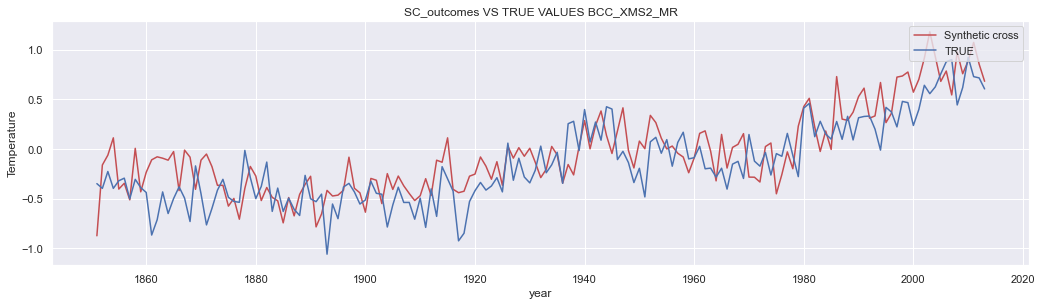

In [289]:

SC_outcomes = (X0_all_plot.T).dot(W)
BCC_XSM2_MR_outcomes = X1_all_plot
fig = plt.figure(figsize=(17.5,4.5)) 

#plt.plot(range(1851,2014),(X0_all_plot.T).dot(W0), 'y--', label="Synthetic ");
plt.plot(range(1851,2014),SC_outcomes, 'r-', label="Synthetic cross");

plt.plot(range(1851,2014),BCC_XSM2_MR_outcomes, 'b-', label="TRUE");

plt.ylabel('Temperature')
plt.xlabel('year')
plt.legend(loc='upper right')
plt.title("SC_outcomes VS TRUE VALUES BCC_XMS2_MR")

plt.show()
fig.savefig("prop99_figure2", dpi=300)
##what does it mean that optimizing for V gives the same result as not optimizing?

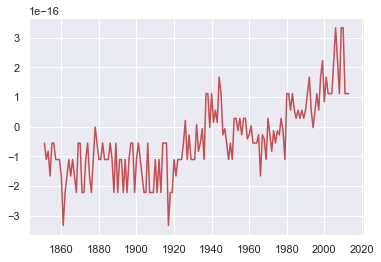

[0.01948    0.11573364 0.01948    0.05399695 0.01948    0.11893563
 0.01948    0.07802107 0.01948    0.02349577 0.01948    0.16619023
 0.03312245 0.0501228  0.01948    0.01948    0.01948    0.01948
 0.01948    0.01948    0.01948    0.01948    0.01948    0.06818149]
[0.04166667 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667
 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667
 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667
 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667]


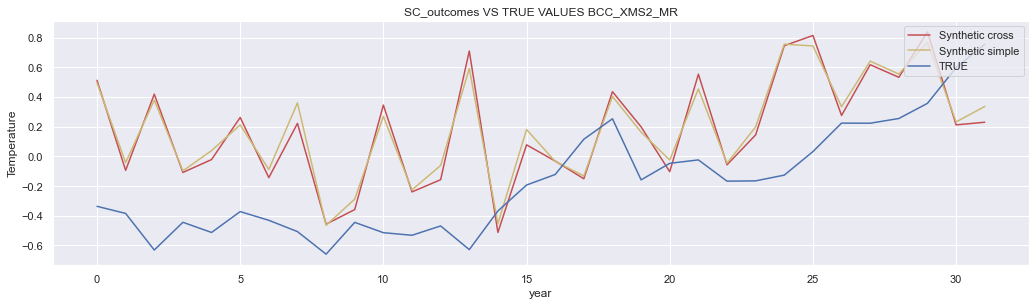

0.2700611315059903


In [14]:
print(V2)
print(v3)
X0_all_5y = X0_all.loc[:,[i for i in list(range(0, 160))]].values
X1_all_5y = X1_all.loc[[i for i in list(range(0, 160))]].values.reshape(-1,1)
X1_all_5y = np.average(X1_all_5y.reshape(-1, 5), axis=1).reshape(-1,1)
X0_all_5y  = np.average(X0_all_5y.reshape(-1, 5), axis=1).reshape(32,12)

fig = plt.figure(figsize=(17.5,4.5)) 

plt.plot(range(0,32),X0_all_5y.dot(w3), 'y-', label="Synthetic simple");

plt.plot(range(0,32),X1_all_5y, 'b-', label="TRUE");

plt.ylabel('Temperature')
plt.xlabel('year')
plt.legend(loc='upper right')
plt.title("SC_outcomes VS TRUE VALUES BCC_XMS2_MR")

plt.show()
fig.savefig("prop99_figure2", dpi=300)
##wHEN AVERAGING OVER 5 YEARS THE SC IS JUST THE CLOSER MODEL TO Y!?
print(mean_squared_error( X1_all_5y,X0_all_5y.dot(w3) ))

Notes: 